In [ ]:
import pandas as pd

s3_path = 'your-s3-path'
df = pd.read_csv(s3_path, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [4]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [5]:
df.describe()

,ID,TIMESTAMP
count,422419.000000,4.224190e+05
mean,211536.764594,1.400445e+12
std,122102.839707,3.733088e+09
min,1.000000,1.394470e+12
25%,105801.500000,1.397349e+12
50%,211655.000000,1.399990e+12
75%,317273.500000,1.403775e+12
max,422937.000000,1.409229e+12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422419 non-null  int64 
 1   TITLE      422419 non-null  object
 2   URL        422419 non-null  object
 3   PUBLISHER  422417 non-null  object
 4   CATEGORY   422419 non-null  object
 5   STORY      422419 non-null  object
 6   HOSTNAME   422419 non-null  object
 7   TIMESTAMP  422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [7]:
df_work = df.copy()

In [9]:
df_work = df_work[['TITLE', 'CATEGORY']]

In [10]:
df_work.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [11]:
my_dict = {
    'e': 'Entertainment',
    'b': 'Business',
    'm': 'Health',
    't': 'Science'
}

In [12]:
def update_category(x):
    return my_dict[x]


df_work['CATEGORY'] = df_work['CATEGORY'].apply(lambda x: update_category(x))

In [17]:
df_work

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",Business
1,Fed's Charles Plosser sees high bar for change...,Business
2,US open: Stocks fall after Fed official hints ...,Business
3,"Fed risks falling 'behind the curve', Charles ...",Business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Business
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,Health
422415,Boy to have surgery on esophagus after battery...,Health
422416,Child who swallowed battery to have reconstruc...,Health
422417,Phoenix boy undergoes surgery to repair throat...,Health


In [24]:
import random

def get_random_by_category(category):
    filtered_df = df_work[df_work['CATEGORY'] == category]
    return filtered_df['TITLE'].sample().values[0]

category = 'Entertainment'
rt = get_random_by_category(category)

print(rt)

Jimmy Fallon Unveils NBC Anchor Brian Williams' Performance Of Snoop  ...


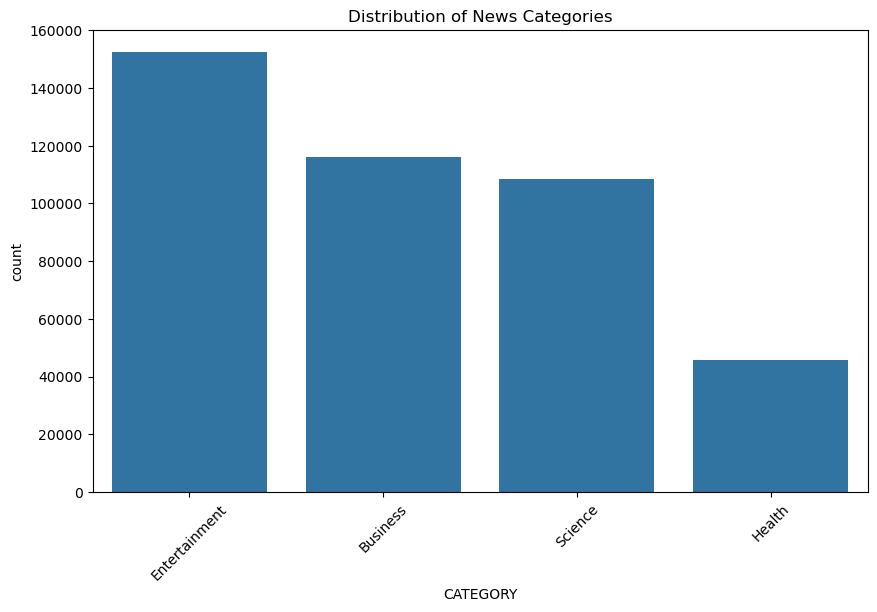

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# bar chart
plt.figure(figsize=(10, 6))

sns.countplot(data=df_work, x='CATEGORY', order=df_work['CATEGORY'].value_counts().index)

# Show the plot
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.show()

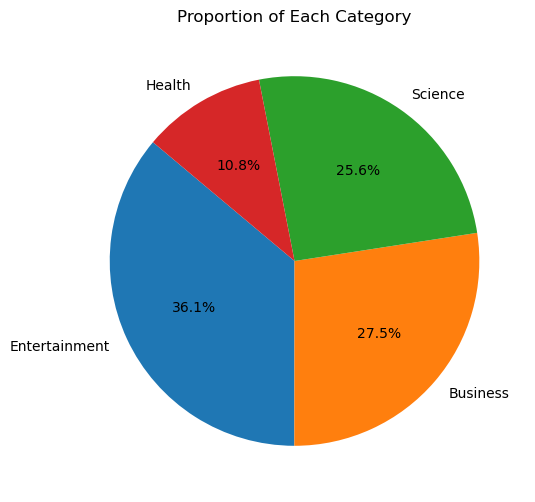

In [31]:
category_counts = df_work['CATEGORY'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Category')
plt.show()